In [1]:
import numpy as np 
import pandas as pd
import calendar

In [2]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
df.sample(4)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
149,Meghalaya,31-01-2020,M,1.66,1491093,65.49,Northeast,25.4670,91.3662
172,Puducherry,30-04-2020,M,75.85,117542,39.30,South,11.9416,79.8083
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.8550
135,Madhya Pradesh,31-07-2020,M,5.08,23940158,40.88,West,22.9734,78.6569


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [7]:
# Changing column names so that they dont have white-spaces, numbers or any special-characters
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [8]:
# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [9]:
# Converting the 'Frequency' column to categorical data type
df['Frequency']= df['Frequency'].astype('category')

In [10]:
df['Month'] =  df['Date'].dt.month

In [11]:
df['MonthNumber'] = df['Month'].apply(lambda x : int(x))

In [12]:
df['MonthName'] =  df['MonthNumber'].apply(lambda x: calendar.month_abbr[x])

In [13]:
df['Region'] = df['Region'].astype('category')

In [14]:
df.drop(columns="Month",inplace=True)

In [15]:
df.sample(5)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,MonthNumber,MonthName
177,Puducherry,2020-09-30,M,10.90,411717,36.84,South,11.9416,79.8083,9,Sep
55,Goa,2020-06-30,M,9.96,489111,42.21,West,15.2993,74.1240,6,Jun
138,Madhya Pradesh,2020-10-31,M,3.13,23144552,38.47,West,22.9734,78.6569,10,Oct
145,Maharashtra,2020-07-31,M,3.89,40998545,41.57,West,19.7515,75.7139,7,Jul
163,Odisha,2020-05-31,M,11.41,11730937,37.04,East,20.9517,85.0985,5,May


In [16]:
round(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe(),2)


,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,267.00,267.00,267.00
mean,12.24,13962105.72,41.68
std,10.80,13366318.36,7.85
min,0.50,117542.00,16.77
25%,4.84,2838930.50,37.26
50%,9.65,9732417.00,40.39
75%,16.76,21878686.00,44.06
max,75.85,59433759.00,69.69


In [17]:
regionState=df.groupby(["Region"])[["Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate"]].mean().reset_index()
regionState

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.916000,1.960237e+07,40.108750
1,North,15.889620,1.307249e+07,38.702658
2,Northeast,10.950263,3.617106e+06,52.055263
3,South,10.454667,1.404059e+07,40.436167
4,West,8.239000,1.862351e+07,41.257000


In [34]:
import seaborn as sbn
import matplotlib.pyplot as plt

In [19]:
corr_matrics=df[["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region","longitude","latitude","MonthNumber","MonthName"]].corr()

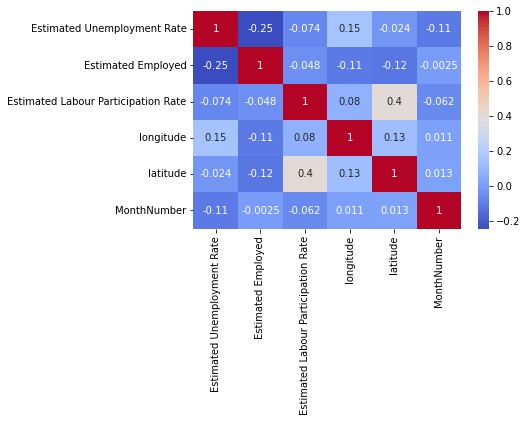

<Figure size 1656x576 with 0 Axes>

In [20]:
sbn.heatmap(corr_matrics,annot=True,cmap="coolwarm")
plt.figure(figsize=(23,8))
plt.show()

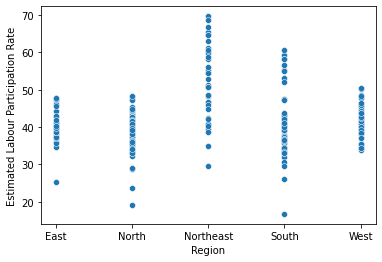

In [21]:
sbn.scatterplot(data=df,x="Region",y="Estimated Labour Participation Rate")
plt.show()

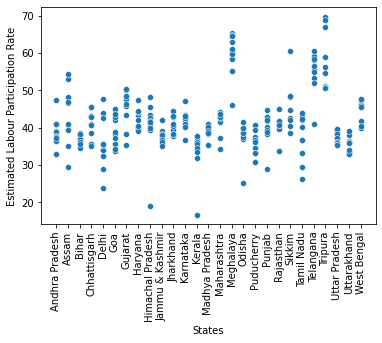

In [22]:
sbn.scatterplot(data=df,x="States",y="Estimated Labour Participation Rate",)
plt.xticks(rotation=90)
plt.show()

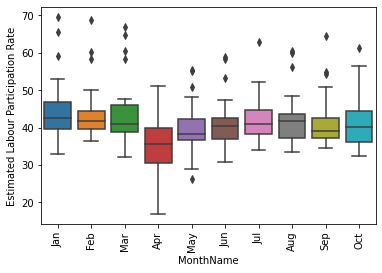

In [23]:
# Creating a scatter matrix plot to denote relationship
sbn.boxplot(data=df,x="MonthName",y="Estimated Labour Participation Rate")
plt.xticks(rotation=90)
plt.show()

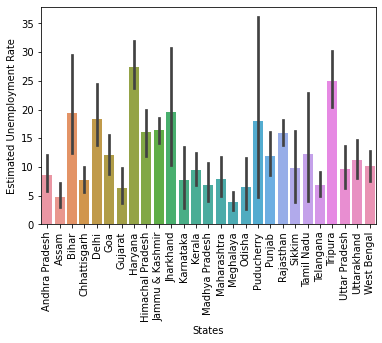

In [24]:
# Plotting a "Bar-plot" to find the "unemployment rate" for each "Region" month-wis
sbn.barplot(data=df, 
             x='States',
             y='Estimated Unemployment Rate')
plt.xticks(rotation=90)
plt.show()

In [32]:
#creating a new dataframe with 'State-wise' & 'Region-wisee' Estimated Unemployment Rate
unempDF = df[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]

unempDF = unempDF.groupby(['Region','States'])['Estimated Labour Participation Rate'].mean().reset_index()

#printing the new dataframe
unempDF.head(4)

,Region,States,Estimated Labour Participation Rate
0,East,Andhra Pradesh,NaN
1,East,Assam,NaN
2,East,Bihar,37.173
3,East,Chhattisgarh,NaN


In [33]:
df["Estimated Unemployment Rate"]

0       5.48
1       5.83
2       5.79
3      20.51
4      17.43
       ...  
262     7.29
263     6.83
264    14.87
265     9.35
266     9.98
Name: Estimated Unemployment Rate, Length: 267, dtype: float64